In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [6]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

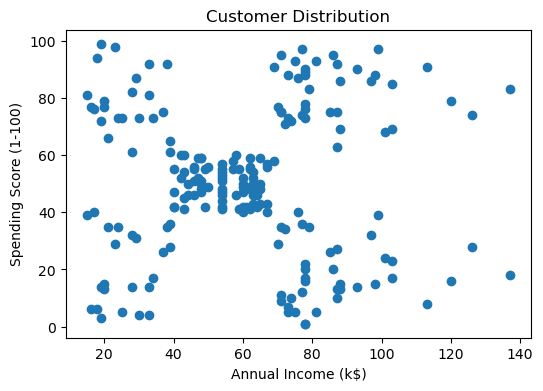

In [10]:
plt.figure(figsize=(6, 4))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution')
plt.show()

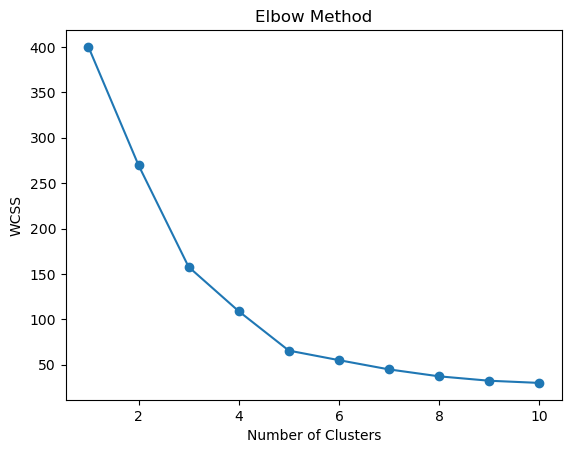

In [17]:
#using the elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)


In [21]:
df['Cluster'] = y_kmeans
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [33]:
cluster_summary = df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_summary)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


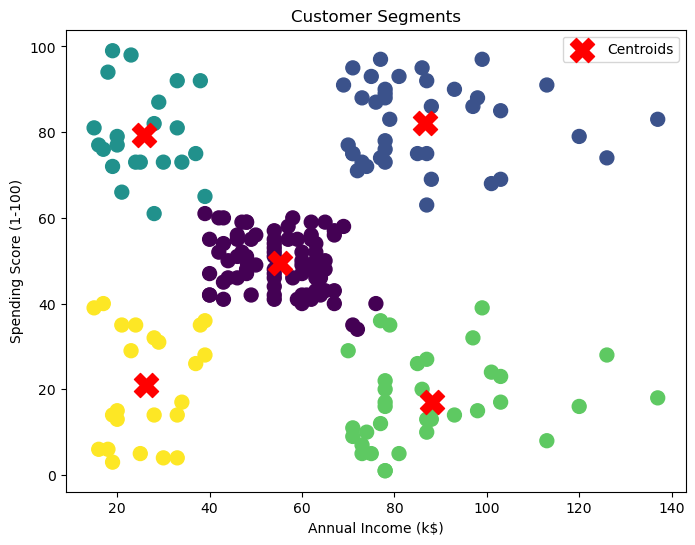

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], cmap='viridis', s=100)

centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1],
            s=300, c='red', marker='X', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.show()

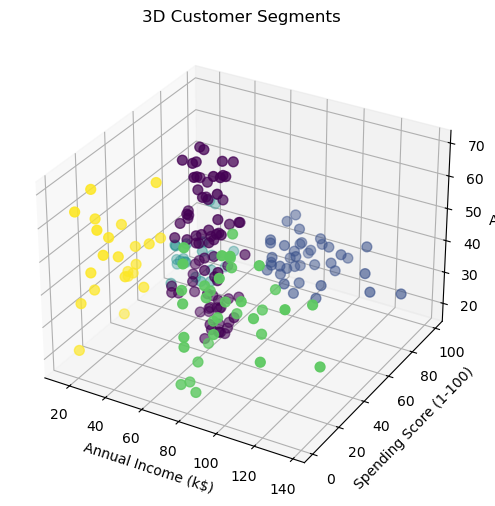

In [27]:
#for 3d graph with age also on the axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
           df['Age'], c=df['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.set_title('3D Customer Segments')
plt.show()


In [43]:
#Bonus 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=10) 
db_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = db_labels
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,DBSCAN_Cluster
0,1,Male,19,15,39,4,-1
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,4,1
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,4,-1


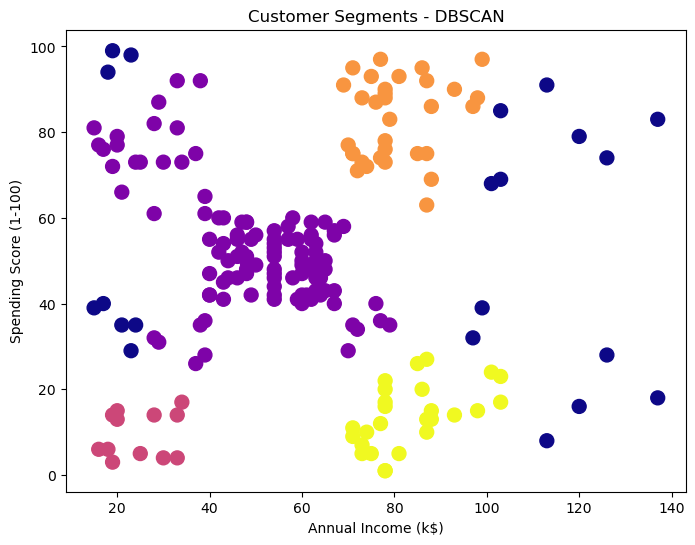

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['DBSCAN_Cluster'], cmap='plasma', s=100)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments - DBSCAN')
plt.show()